# HomeWork 5 Juypter Book

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Deep-Learning

NOTE FOR GRADER : THIS NOTEBOOK REQUIRES MULTIPLE FILES AS OUTLINE IN THE IMPORT LIST, OTHERWISE THIS WILL NOT WORK

In [20]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from data.hw5DataLoader import *
from training.train import *
from training.basicEval import *
from model.transformer import *
from data.hw3Text import NextCharacterText as hw3Text
from data.hw4Text import french_to_english, english_to_french

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 100

# Problem 1
Similar to homework 3, we focus on the language model we did in the lectures. Here is the sequence:

Inspired by the course example, train and validate a transformer model, for learning the above sequence. Use sequence lengths of 10, 20, and 30 for your training. Feel free to adjust other network parameters. Report and compare training loss, validation accuracy, execution time for training, and computational and mode size complexities against RNN-based approaches (with and without cross-attention).

In [3]:
name = "Problem 1 - NLP Transformer"
sequences = [10, 20, 30]

hiddenSize = 256
numLayers = 3
nhead = 2
batchSize = 128



trainingLoaders, validationLoaders, charToIdxs, idxToChars, vocabSizes = prepareMultiData(hw3Text, 
                                                                                          sequenceLen=sequences, 
                                                                                          batchSize = batchSize)

model = Transformer(input_size=vocabSizes[0], 
                    hidden_size=hiddenSize, 
                    output_size=vocabSizes[0], 
                    num_layers=numLayers, 
                    nhead=nhead).to(device)



names, models, trainingLosesMulti, validationAccuraciesMulti, trainAccuraciesMulti, validationLossesMulti, epochTimesMulti, trueLabelsListsMulti, predictedLabelsListsMulti = trainMultiSequence(name, 
                                                                                                                                                                                                 model, 
                                                                                                                                                                                                 sequences=sequences, 
                                                                                                                                                                                                 epochs=epochs, 
                                                                                                                                                                                                 learningRate=0.001, 
                                                                                                                                                                                                 trainingLoader=trainingLoaders, 
                                                                                                                                                                                                 validationLoader=validationLoaders)

Training model for sequence length 10
Training on device: cuda
Epoch  10/100 | Train Loss: 1.5526 | Train Acc: 52.58% | Val Loss: 2.4008 | Val Acc: 34.03%
  Epoch time: 0.16 sec | Inference time: 0.01 sec
Epoch  20/100 | Train Loss: 0.8519 | Train Acc: 72.32% | Val Loss: 3.0274 | Val Acc: 33.61%
  Epoch time: 0.16 sec | Inference time: 0.01 sec
Epoch  30/100 | Train Loss: 0.5442 | Train Acc: 83.05% | Val Loss: 3.6572 | Val Acc: 36.13%
  Epoch time: 0.16 sec | Inference time: 0.01 sec
Epoch  40/100 | Train Loss: 0.4539 | Train Acc: 84.58% | Val Loss: 3.8103 | Val Acc: 36.34%
  Epoch time: 0.16 sec | Inference time: 0.01 sec
Epoch  50/100 | Train Loss: 0.4158 | Train Acc: 86.58% | Val Loss: 4.1917 | Val Acc: 32.98%
  Epoch time: 0.16 sec | Inference time: 0.01 sec
Epoch  60/100 | Train Loss: 0.3066 | Train Acc: 89.58% | Val Loss: 4.2792 | Val Acc: 36.55%
  Epoch time: 0.16 sec | Inference time: 0.01 sec
Epoch  70/100 | Train Loss: 0.2774 | Train Acc: 90.58% | Val Loss: 4.4788 | Val Acc: 

Problem 1 - NLP Transformer - 10 Final Training Accuracy: 92.63%
Problem 1 - NLP Transformer - 10 Final Validation Accuracy: 37.82%
Problem 1 - NLP Transformer - 10 Total Training Time: 16.16 seconds

Problem 1 - NLP Transformer - 20 Final Training Accuracy: 94.08%
Problem 1 - NLP Transformer - 20 Final Validation Accuracy: 31.22%
Problem 1 - NLP Transformer - 20 Total Training Time: 28.13 seconds

Problem 1 - NLP Transformer - 30 Final Training Accuracy: 92.83%
Problem 1 - NLP Transformer - 30 Final Validation Accuracy: 26.48%
Problem 1 - NLP Transformer - 30 Total Training Time: 39.93 seconds



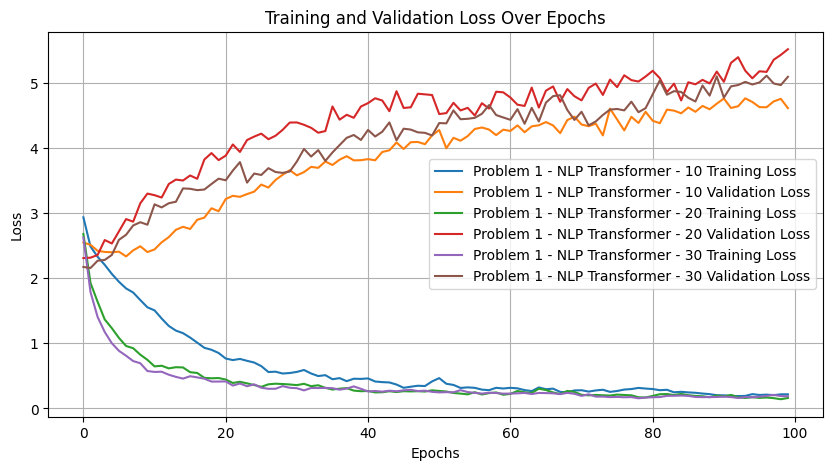

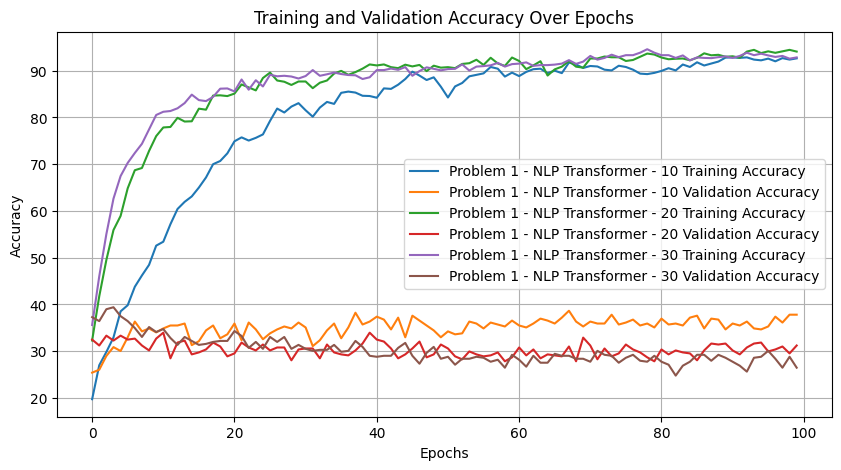

In [4]:
reportMultiFinalMetrics(trainAccuraciesMulti, validationAccuraciesMulti, epochTimesMulti, names)
plotMultiLoss(trainingLosesMulti, validationLossesMulti, names)
plotMultAccuracy(trainAccuraciesMulti, validationAccuraciesMulti, names)

# Problem 2

Similar to homework 3, Build a transformer model, for the tiny Shakespeare dataset, the data loader code is already provided. User 2 transformer layers with 2 heads.

Train the models for the sequence of 20 and 30, report and compare training loss, validation accuracy, execution time for training, and computational and mode size complexities, and compare it against RNN-based models.
Adjust the hyperparameters (number of layers, hidden size, and the number of heads) and compare your results (training and validation loss, computation complexity, model size, training and inference time, and the output sequence). For this, explore transformer architecture with 1, 2, and 4 layers, with 2 and 4 heads (8 different combinations). Analyze their influence on accuracy, running time, and computational perplexity.  
What if we increase the sequence length to 50. Perform the training and report the accuracy and model complexity results.

In [9]:
name = "Problem 2 - Shakespeare"
sequences = [10, 20]
hiddenSize = 128
numLayers = 3
nhead = 2
batchSize = 128
epochs = 20

trainingLoaders, validationLoaders, charToIdxs, idxToChars, vocabSizes = prepareMultiDataURL(url, 
                                                                                            sequenceLen=sequences, 
                                                                                            batchSize = batchSize)

model = Transformer(input_size=vocabSizes[0], 
                    hidden_size=hiddenSize, 
                    output_size=vocabSizes[0], 
                    num_layers=numLayers, 
                    nhead=nhead).to(device)



names, models, trainingLosesMulti, validationAccuraciesMulti, trainAccuraciesMulti, validationLossesMulti, epochTimesMulti, trueLabelsListsMulti, predictedLabelsListsMulti = trainMultiSequence(name, 
                                                                                                                                                                                                 model, 
                                                                                                                                                                                                 sequences=sequences, 
                                                                                                                                                                                                 epochs=epochs, 
                                                                                                                                                                                                 learningRate=0.001, 
                                                                                                                                                                                                 trainingLoader=trainingLoaders, 
                                                                                                                                                                                                 validationLoader=validationLoaders)

Training model for sequence length 10
Training on device: cuda
Epoch   1/20 | Train Loss: 2.3009 | Train Acc: 32.63% | Val Loss: 2.1649 | Val Acc: 35.73%
  Epoch time: 45.85 sec | Inference time: 3.09 sec
Epoch   2/20 | Train Loss: 2.1645 | Train Acc: 36.11% | Val Loss: 2.0960 | Val Acc: 37.90%
  Epoch time: 45.52 sec | Inference time: 3.13 sec
Epoch   3/20 | Train Loss: 2.1150 | Train Acc: 37.30% | Val Loss: 2.0621 | Val Acc: 38.60%
  Epoch time: 45.70 sec | Inference time: 3.12 sec
Epoch   4/20 | Train Loss: 2.0821 | Train Acc: 38.07% | Val Loss: 2.0305 | Val Acc: 39.58%
  Epoch time: 45.53 sec | Inference time: 3.11 sec
Epoch   5/20 | Train Loss: 2.0591 | Train Acc: 38.65% | Val Loss: 2.0167 | Val Acc: 39.88%
  Epoch time: 45.44 sec | Inference time: 3.11 sec
Epoch   6/20 | Train Loss: 2.0402 | Train Acc: 39.16% | Val Loss: 1.9933 | Val Acc: 40.50%
  Epoch time: 45.41 sec | Inference time: 3.10 sec
Epoch   7/20 | Train Loss: 2.0244 | Train Acc: 39.58% | Val Loss: 1.9867 | Val Acc: 4

Problem 2 - Shakespeare - 10 Final Training Accuracy: 42.21%
Problem 2 - Shakespeare - 10 Final Validation Accuracy: 43.05%
Problem 2 - Shakespeare - 10 Total Training Time: 914.56 seconds

Problem 2 - Shakespeare - 20 Final Training Accuracy: 37.90%
Problem 2 - Shakespeare - 20 Final Validation Accuracy: 37.58%
Problem 2 - Shakespeare - 20 Total Training Time: 1478.55 seconds



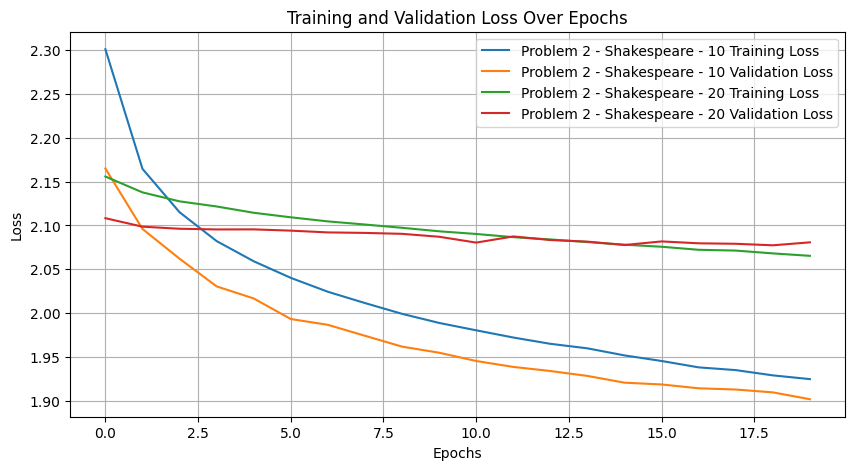

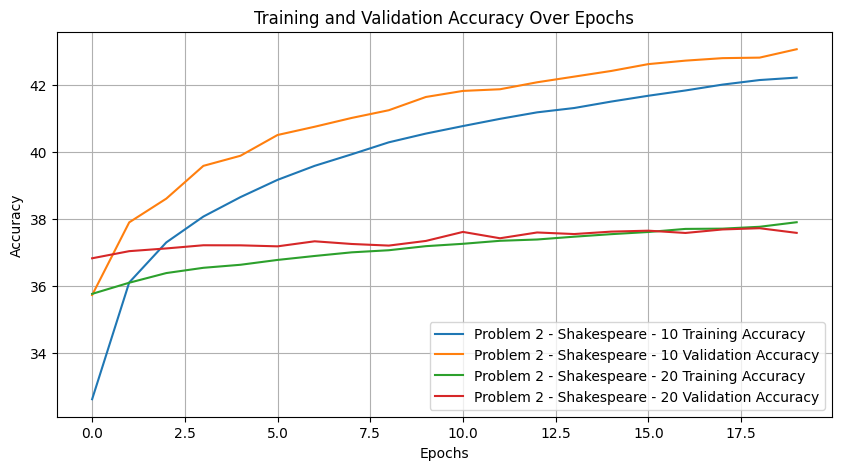

In [10]:
reportMultiFinalMetrics(trainAccuraciesMulti, validationAccuraciesMulti, epochTimesMulti, names)
plotMultiLoss(trainingLosesMulti, validationLossesMulti, names)
plotMultAccuracy(trainAccuraciesMulti, validationAccuraciesMulti, names)

# Problem 2 - Increasing Layers and Heads

In [17]:
name = "Problem 2 - Shakespeare Different Layers"
sequences = [10, 20]
hiddenSize = 128
numLayers = 4
nhead = 2
batchSize = 128
epochs = 20

trainingLoaders, validationLoaders, charToIdxs, idxToChars, vocabSizes = prepareMultiDataURL(url, 
                                                                                            sequenceLen=sequences, 
                                                                                            batchSize = batchSize)

model = Transformer(input_size=vocabSizes[0], 
                    hidden_size=hiddenSize, 
                    output_size=vocabSizes[0], 
                    num_layers=numLayers, 
                    nhead=nhead).to(device)



names, models, trainingLosesMulti, validationAccuraciesMulti, trainAccuraciesMulti, validationLossesMulti, epochTimesMulti, trueLabelsListsMulti, predictedLabelsListsMulti = trainMultiSequence(name, 
                                                                                                                                                                                                 model, 
                                                                                                                                                                                                 sequences=sequences, 
                                                                                                                                                                                                 epochs=epochs, 
                                                                                                                                                                                                 learningRate=0.001, 
                                                                                                                                                                                                 trainingLoader=trainingLoaders, 
                                                                                                                                                                                                 validationLoader=validationLoaders)

Training model for sequence length 10
Training on device: cuda
Epoch   1/20 | Train Loss: 2.3134 | Train Acc: 32.27% | Val Loss: 2.1732 | Val Acc: 35.79%
  Epoch time: 59.77 sec | Inference time: 3.80 sec
Epoch   2/20 | Train Loss: 2.1716 | Train Acc: 35.77% | Val Loss: 2.1061 | Val Acc: 37.50%
  Epoch time: 59.00 sec | Inference time: 3.81 sec
Epoch   3/20 | Train Loss: 2.1217 | Train Acc: 37.12% | Val Loss: 2.0744 | Val Acc: 38.44%
  Epoch time: 59.01 sec | Inference time: 3.80 sec
Epoch   4/20 | Train Loss: 2.0898 | Train Acc: 37.91% | Val Loss: 2.0433 | Val Acc: 39.11%
  Epoch time: 60.81 sec | Inference time: 4.00 sec
Epoch   5/20 | Train Loss: 2.0683 | Train Acc: 38.47% | Val Loss: 2.0256 | Val Acc: 39.66%
  Epoch time: 59.47 sec | Inference time: 3.81 sec
Epoch   6/20 | Train Loss: 2.0503 | Train Acc: 38.90% | Val Loss: 2.0062 | Val Acc: 40.07%
  Epoch time: 59.54 sec | Inference time: 3.76 sec
Epoch   7/20 | Train Loss: 2.0350 | Train Acc: 39.32% | Val Loss: 2.0003 | Val Acc: 4

Problem 2 - Shakespeare Different Layers - 10 Final Training Accuracy: 41.65%
Problem 2 - Shakespeare Different Layers - 10 Final Validation Accuracy: 42.47%
Problem 2 - Shakespeare Different Layers - 10 Total Training Time: 1199.79 seconds

Problem 2 - Shakespeare Different Layers - 20 Final Training Accuracy: 37.09%
Problem 2 - Shakespeare Different Layers - 20 Final Validation Accuracy: 37.20%
Problem 2 - Shakespeare Different Layers - 20 Total Training Time: 2018.84 seconds



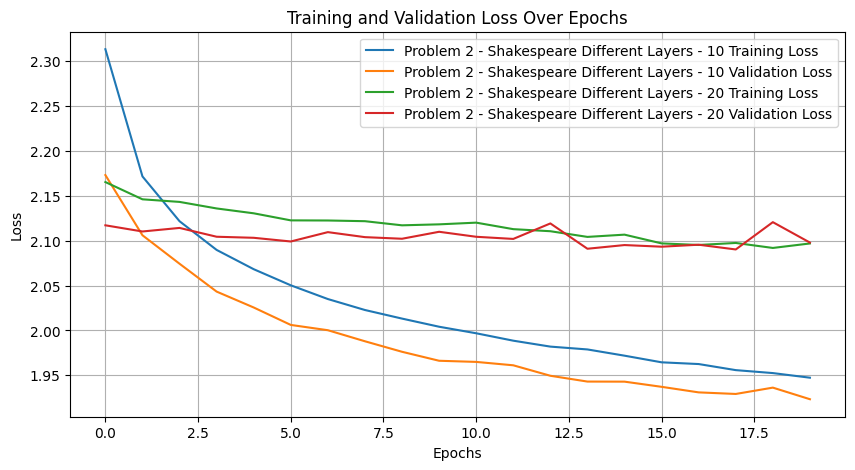

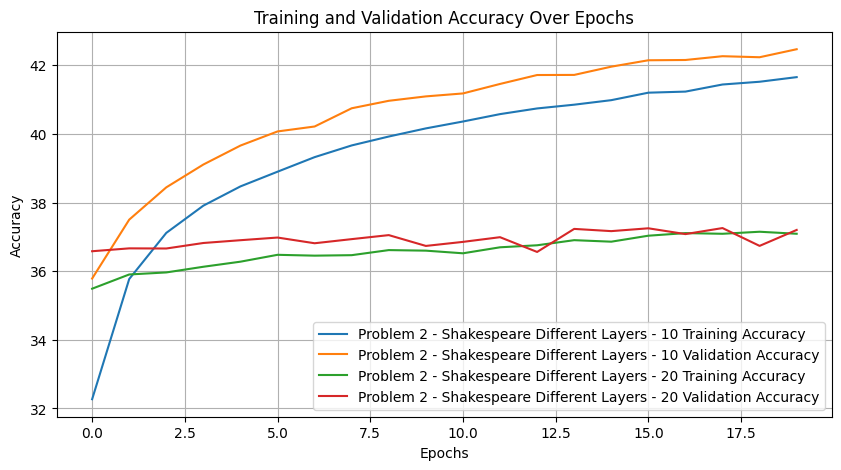

In [18]:
reportMultiFinalMetrics(trainAccuraciesMulti, validationAccuraciesMulti, epochTimesMulti, names)
plotMultiLoss(trainingLosesMulti, validationLossesMulti, names)
plotMultAccuracy(trainAccuraciesMulti, validationAccuraciesMulti, names)

# Problem 2 With Sequence Length 50

In [21]:
name = "Problem 2 - Shakespeare"
sequences = [50]
hiddenSize = 128
numLayers = 3
nhead = 2
batchSize = 128
epochs = 20

trainingLoaders, validationLoaders, charToIdxs, idxToChars, vocabSizes = prepareMultiDataURL(url, 
                                                                                            sequenceLen=sequences, 
                                                                                            batchSize = batchSize)

model = Transformer(input_size=vocabSizes[0], 
                    hidden_size=hiddenSize, 
                    output_size=vocabSizes[0], 
                    num_layers=numLayers, 
                    nhead=nhead).to(device)



names, models, trainingLosesMulti, validationAccuraciesMulti, trainAccuraciesMulti, validationLossesMulti, epochTimesMulti, trueLabelsListsMulti, predictedLabelsListsMulti = trainMultiSequence(name, 
                                                                                                                                                                                                 model, 
                                                                                                                                                                                                 sequences=sequences, 
                                                                                                                                                                                                 epochs=epochs, 
                                                                                                                                                                                                 learningRate=0.001, 
                                                                                                                                                                                                 trainingLoader=trainingLoaders, 
                                                                                                                                                                                                 validationLoader=validationLoaders)

Training model for sequence length 50
Training on device: cuda
Epoch   1/20 | Train Loss: 2.4656 | Train Acc: 27.37% | Val Loss: 2.4022 | Val Acc: 28.85%
  Epoch time: 165.98 sec | Inference time: 12.78 sec
Epoch   2/20 | Train Loss: 2.3853 | Train Acc: 29.35% | Val Loss: 2.3516 | Val Acc: 30.10%
  Epoch time: 165.10 sec | Inference time: 12.75 sec
Epoch   3/20 | Train Loss: 2.3529 | Train Acc: 30.18% | Val Loss: 2.3233 | Val Acc: 30.84%
  Epoch time: 165.10 sec | Inference time: 13.23 sec
Epoch   4/20 | Train Loss: 2.3324 | Train Acc: 30.66% | Val Loss: 2.3050 | Val Acc: 31.35%
  Epoch time: 167.67 sec | Inference time: 12.78 sec
Epoch   5/20 | Train Loss: 2.3171 | Train Acc: 31.06% | Val Loss: 2.2926 | Val Acc: 31.56%
  Epoch time: 163.83 sec | Inference time: 12.74 sec
Epoch   6/20 | Train Loss: 2.3062 | Train Acc: 31.30% | Val Loss: 2.2862 | Val Acc: 31.84%
  Epoch time: 164.69 sec | Inference time: 12.83 sec
Epoch   7/20 | Train Loss: 2.2968 | Train Acc: 31.52% | Val Loss: 2.2765 

Problem 2 - Shakespeare - 50 Final Training Accuracy: 32.72%
Problem 2 - Shakespeare - 50 Final Validation Accuracy: 32.62%
Problem 2 - Shakespeare - 50 Total Training Time: 3304.65 seconds



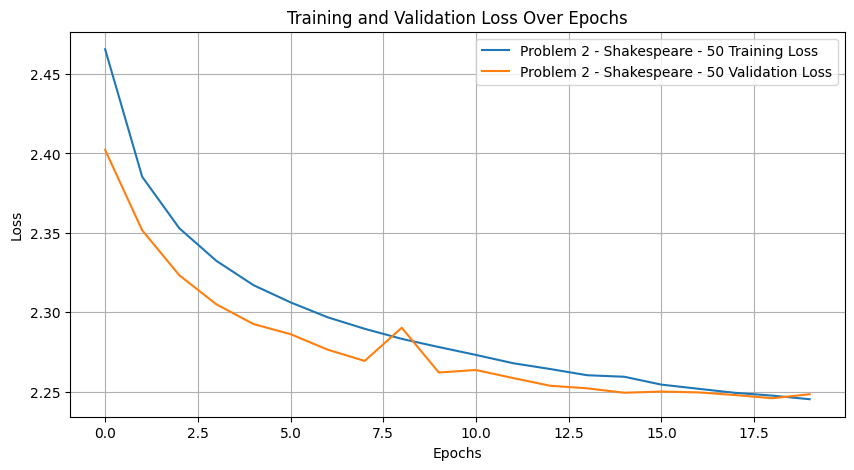

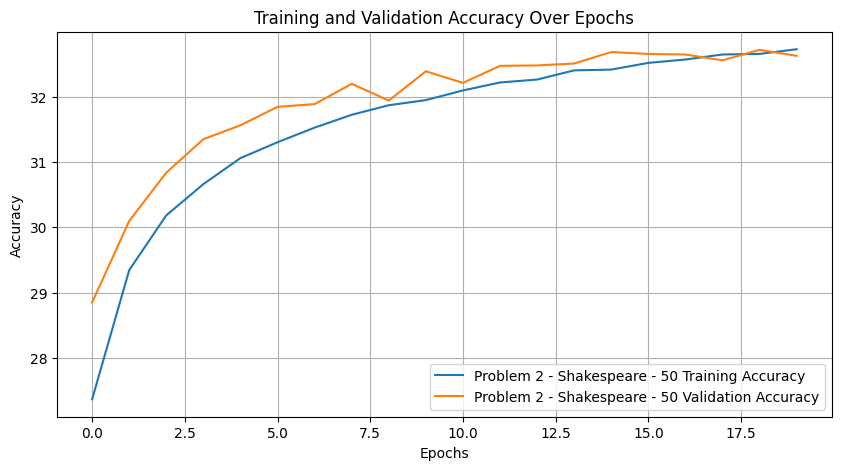

In [22]:
reportMultiFinalMetrics(trainAccuraciesMulti, validationAccuraciesMulti, epochTimesMulti, names)
plotMultiLoss(trainingLosesMulti, validationLossesMulti, names)
plotMultAccuracy(trainAccuraciesMulti, validationAccuraciesMulti, names)